# Course: Building Clustering Models with scikit-learn
## Module 5: Applying Clustering to Image Data

ML models work only with numeric data
Images are already numbers (matrices/numpy arrays)
Each image pixel has a numeric representation

Color Pixel - RGB
- 3 values (channels) RGB
- Each value ranges from 0 - 255
- e.g., (0, 0, 255)

Grayscale Pixels
- 1 value (single channel) that represents intensity
- Ranges from 0.0 to 1.0

Images can be represented as 3D matrix:
- Width
- Height
- Number of channels

A Tensor is a list of images, the count of images giving a 4th dimension (each image must be of the same size).
- 3D Representation: (height, width, channel_count)
- 4D Representation: (image_count, height, width, channel_count)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
from sklearn.cluster import KMeans
from sklearn import metrics
from sklearn.cluster import MiniBatchKMeans

import warnings
warnings.filterwarnings("ignore")

In [3]:
# Available online but I took from the course files
mnist_data = pd.read_csv('datasets/mnist.csv')

# Each record represents the pixel intensity values for the grayscale handwritten digit images (along with its label)
mnist_data.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
mnist_data.shape

(42000, 785)

In [5]:
# 10 labels (10 digits 0 - 9)
sorted(mnist_data['label'].unique())

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

In [6]:
# Won't use the label as clustering is unsupervised
mnist_features = mnist_data.drop('label', axis=1)

mnist_features.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [7]:
mnist_labels = mnist_data['label']

mnist_labels.head()

0    1
1    0
2    1
3    4
4    0
Name: label, dtype: int64

In [8]:
# Takes the index of an image in the mnist_features dataframe, prints the digit, and plots the pixels
def display_image(index):
    print("Digit: ", mnist_labels[index])
        
    plt.imshow(mnist_features.loc[index].values.reshape(28,28), cmap='Greys')

Digit:  0


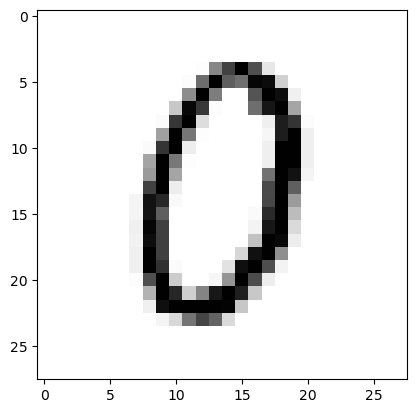

In [9]:
display_image(5)

Digit:  6


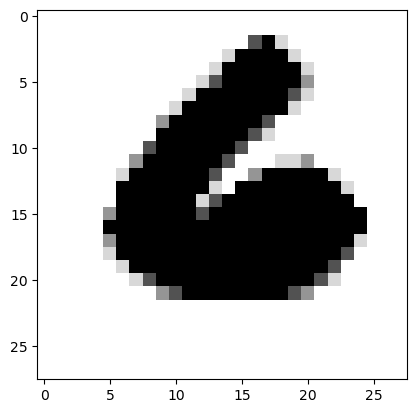

In [10]:
display_image(500)

In [11]:
# 10 clusters, 1 for each digit
kmeans_model = KMeans(n_clusters=10, max_iter=1000).fit(mnist_features)

In [12]:
kmeans_centroids = kmeans_model.cluster_centers_

# Fairly meaningless to view this as they are all matrices with 784 pixels
kmeans_centroids

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [13]:
kmeans_centroids.shape

(10, 784)

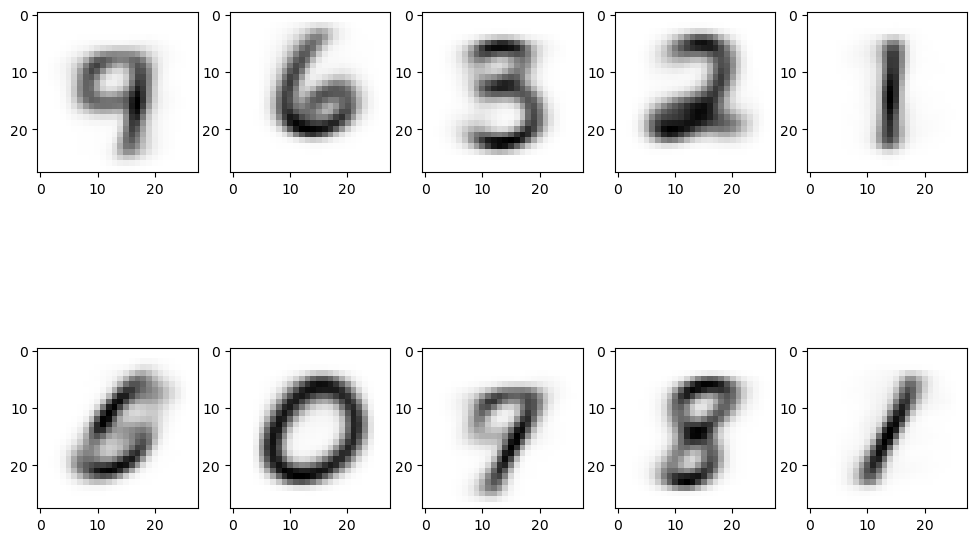

In [15]:
# Visualize the centroid images
fig, ax = plt.subplots(figsize=(12, 8))

for centroid in range(len(kmeans_centroids)):
    plt.subplot(2, 5, centroid + 1)

    # The image records and centroids are 1D (flattened pixels) requiring us to reshape to plot
    plt.imshow(kmeans_centroids[centroid].reshape(28, 28), cmap='Greys')

In [16]:
# We have 10 labels as we specified 10 clusters, but the plot above shows not all digits are represented
np.unique(kmeans_model.labels_)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=int32)

In [17]:
mnist_test = mnist_data.sample(10, replace=False)

mnist_test_features = mnist_test.drop('label', axis=1)

mnist_test_labels = mnist_test['label']

In [18]:
mnist_test_labels

12613    2
35850    6
27917    9
2257     4
17069    9
18041    7
39768    8
1526     9
40178    5
41600    9
Name: label, dtype: int64

In [19]:
mnist_test_labels = np.array(mnist_test_labels)

mnist_test_labels

array([2, 6, 9, 4, 9, 7, 8, 9, 5, 9])

In [20]:
pred_clusters = kmeans_model.predict(mnist_test_features)

In [21]:
pred_results = pd.DataFrame({'actual_digit': mnist_test_labels,
                             'pred_cluster': pred_clusters})

pred_results.head(10)

,actual_digit,pred_cluster
0,2,3
1,6,1
2,9,7
3,4,0
4,9,7
5,7,7
6,8,4
7,9,7
8,5,8
9,9,7


In [22]:
# Now try mini-batch
minibatch_kmeans_model = MiniBatchKMeans(n_clusters=10, max_iter=10000, batch_size=100).fit(mnist_features)

In [23]:
minibatch_kmeans_centroids = kmeans_model.cluster_centers_

minibatch_kmeans_centroids.shape

(10, 784)

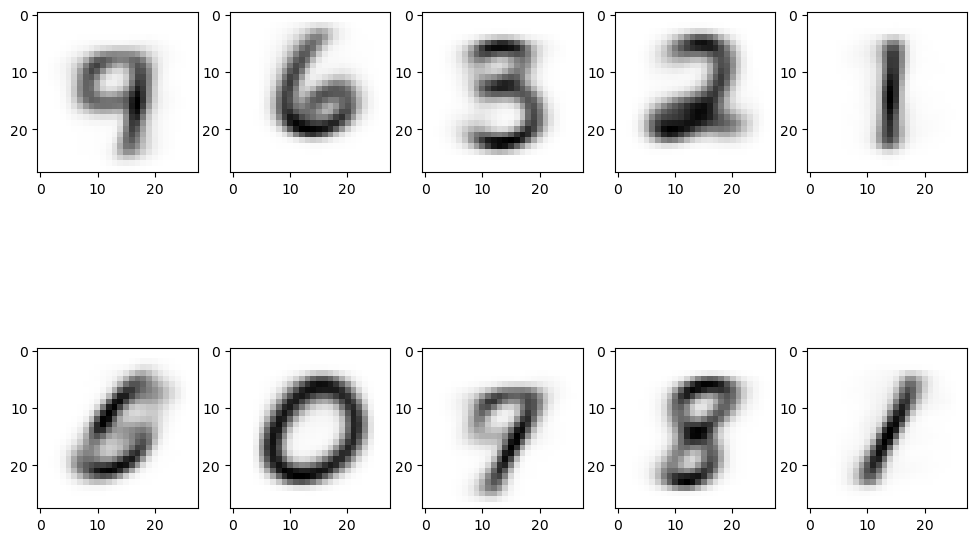

In [24]:
fig, ax = plt.subplots(figsize=(12, 8))

for centroid in range(len(minibatch_kmeans_centroids)):
    plt.subplot(2, 5, centroid + 1)

    plt.imshow(minibatch_kmeans_centroids[centroid].reshape(28, 28), cmap='Greys')
    
# Note very similiar to the full k-means clusters